In [362]:
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pickle

In [363]:
dataset= r'data_rfe25new.csv'
data=pd.DataFrame(pd.read_csv(dataset))

In [364]:
X = data.values[:, :-1]
y = data.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)


for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])



for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [281]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


param_grid = {
    'n_estimators': [50,80,100,120],
    'max_depth': [6, 7],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2, 4],
    'max_features':[1,2],
    'random_state':[0,1]
}

# Create a RandomForestClassifier object
rfc = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")


Best parameters: {'max_depth': 6, 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 0}
Best score: 0.8230769230769232


In [365]:
clf = RandomForestClassifier(max_depth=7,random_state=0,min_samples_leaf=1,max_features=1,min_samples_split=2,n_estimators=100)
clf.fit(X,y)
RF=clf.fit(X,y)

[0.         0.         0.07692308 0.15384615 0.15384615 0.46153846
 1.        ]
[0.         0.33333333 0.66666667 0.66666667 1.         1.
 1.        ]


<Figure size 640x480 with 0 Axes>

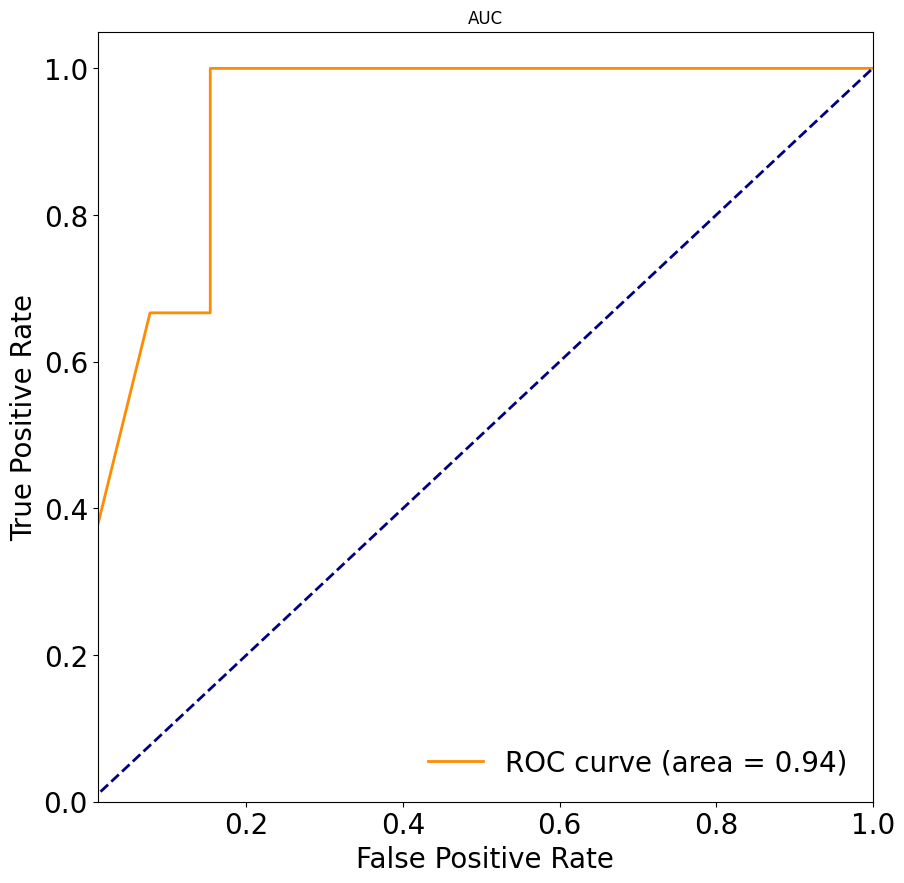

In [355]:
#画出ROC曲线 RandomForest test
y_score = clf.fit(X, y).predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.01, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.title('AUC')
plt.legend(loc="lower right",fontsize=20,frameon=False)
plt.show()

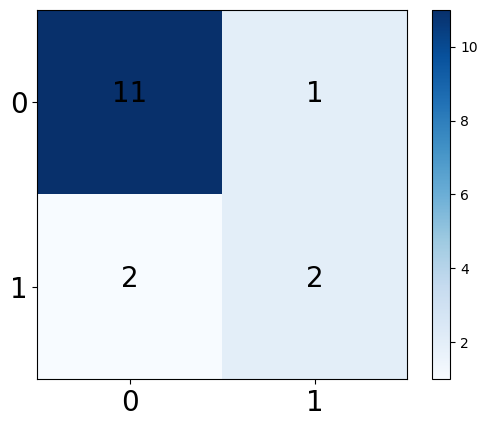

true: 13


In [356]:
#画出混淆矩阵 RandomForest test
clf.fit(X, y)
prey=clf.predict(X_test)
true=0
for i in range(0,len(y_test)):
 if prey[i]==y_test[i]:
     true=true+1
C = confusion_matrix(y_test, prey, labels=[0,1])
plt.imshow(C, cmap=plt.cm.Blues)
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=20)
plt.yticks(indices, [0, 1],fontsize=20)
plt.colorbar()
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
        plt.text(first_index, second_index, C[first_index][second_index],fontsize=20,horizontalalignment='center')
plt.show()
print("true:",true)

[0.         0.         0.03921569 0.05882353 0.11764706 0.11764706
 0.1372549  0.1372549  0.15686275 0.17647059 0.21568627 0.23529412
 0.31372549 0.37254902 0.41176471 0.43137255 0.47058824 0.54901961
 0.56862745 0.60784314 0.62745098 0.70588235 0.76470588 0.84313725
 0.8627451  0.90196078 0.92156863 0.94117647 1.        ]
[0.         0.09090909 0.09090909 0.18181818 0.18181818 0.36363636
 0.36363636 0.45454545 0.45454545 0.54545455 0.63636364 0.63636364
 0.63636364 0.72727273 0.72727273 0.81818182 0.81818182 0.81818182
 0.81818182 0.81818182 0.81818182 0.81818182 0.81818182 0.81818182
 0.81818182 0.90909091 1.         1.         1.        ]


<Figure size 640x480 with 0 Axes>

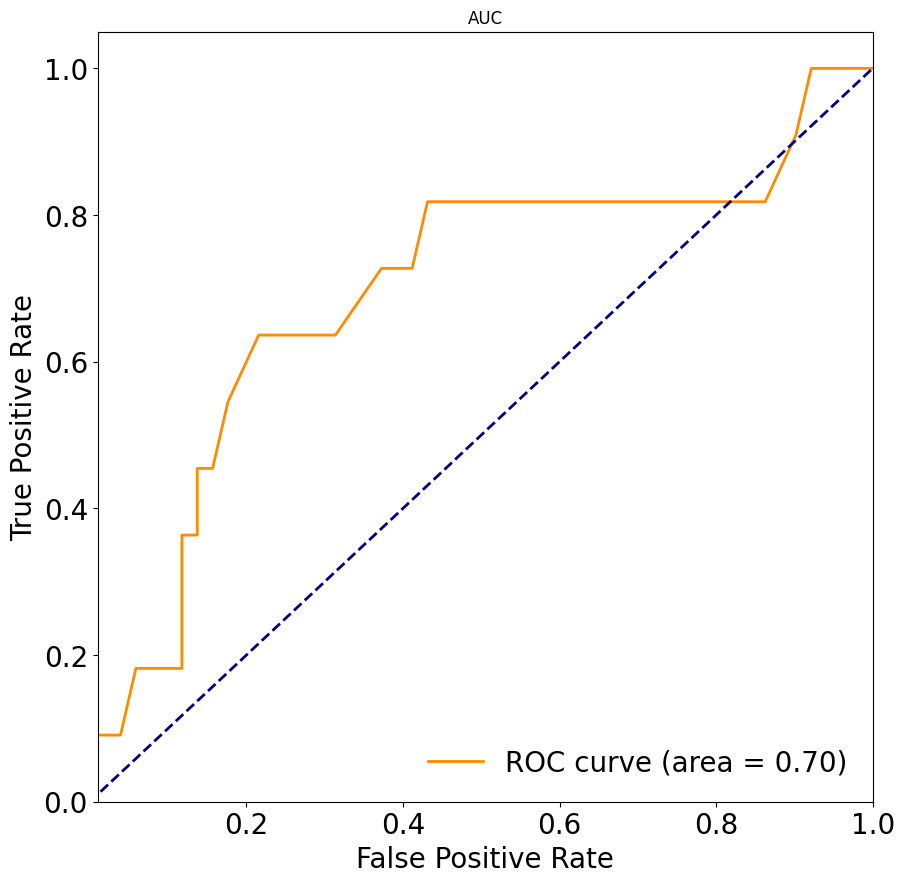

In [357]:
#画出ROC曲线 RandomForest train的AUC
y_score = clf.fit(X, y).predict_proba(X_train)
fpr,tpr,threshold = roc_curve(y_train, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.01, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('AUC')
plt.legend(loc="lower right",fontsize=20,frameon=False)
plt.show()

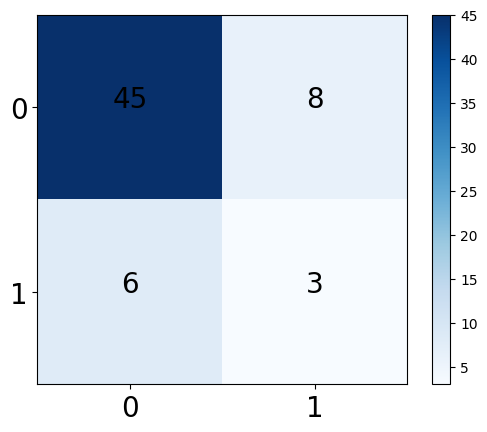

true: 48


In [358]:
#画出混淆矩阵 RandomForest train 混淆矩阵
clf.fit(X, y)
prey=clf.predict(X_train)
true=0
for i in range(0,len(y_train)):
 if prey[i]==y_train[i]:
     true=true+1
C = confusion_matrix(y_train, prey, labels=[0,1])
plt.imshow(C, cmap=plt.cm.Blues)
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=20)
plt.yticks(indices, [0, 1],fontsize=20)
plt.colorbar()
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
        plt.text(first_index, second_index, C[first_index][second_index],fontsize=20,horizontalalignment='center')
plt.show()
print("true:",true)

In [366]:
pickle.dump(RF,open("RF.dat","wb"))

In [359]:
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, make_scorer

# Generate some data for classification
X, y = X_train, y_train

# Define the ExtraTreesClassifier
et_clf = ExtraTreesClassifier()

# Define the parameters to search
params = {
    'n_estimators': [2,50,100, 200],
    'max_depth': [None, 5, 7,10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Define the scoring metric
scoring = make_scorer(accuracy_score)

# Define the grid search with cross-validation
grid_search = GridSearchCV(et_clf, params, scoring=scoring, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Score:  0.8564102564102564


In [335]:
clf=ExtraTreesClassifier(n_estimators=2, max_depth=None,min_samples_split=2, random_state=1,max_features='sqrt',min_samples_leaf=4)

[0.         0.15384615 0.30769231 0.30769231 0.46153846 0.76923077
 0.92307692 1.        ]
[0.         0.         0.         0.66666667 1.         1.
 1.         1.        ]


<Figure size 640x480 with 0 Axes>

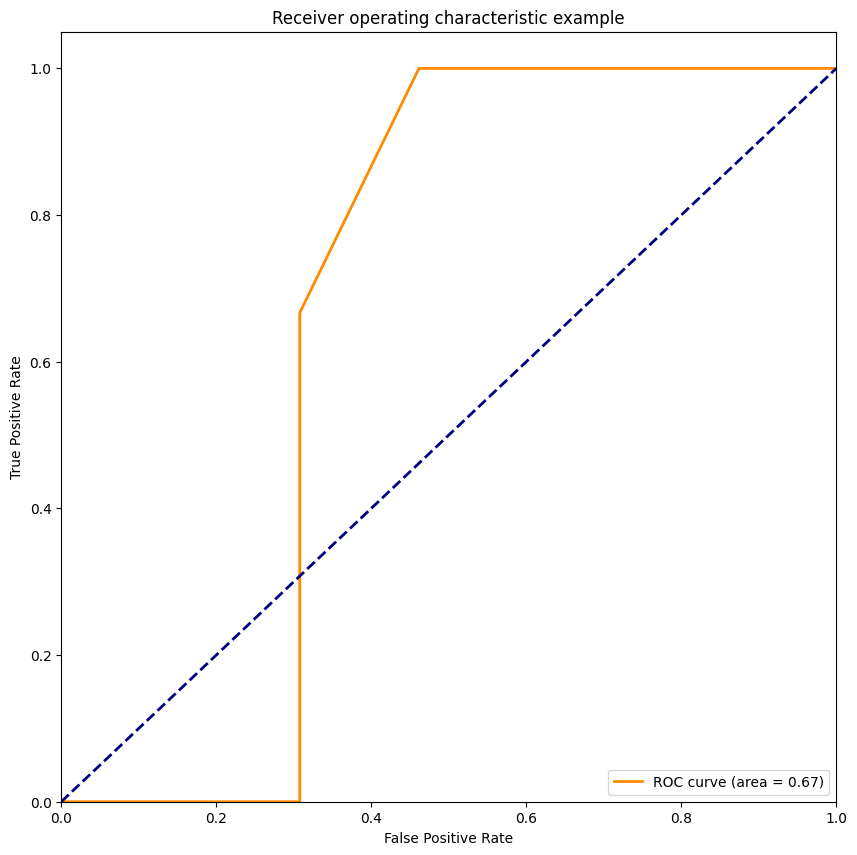

In [336]:
#画出ROC曲线 ExtraTrees test
y_score = clf.fit(X, y).predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

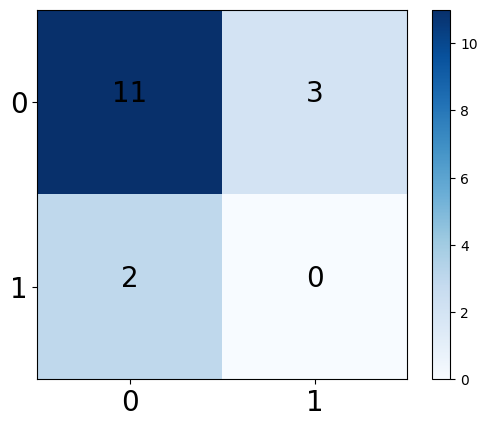

true: 11


In [337]:
#画出混淆矩阵 ExtraTrees
clf.fit(X, y)
prey=clf.predict(X_test)
true=0
for i in range(0,len(y_test)):
 if prey[i]==y_test[i]:
     true=true+1
C = confusion_matrix(y_test, prey, labels=[0,1])
plt.imshow(C, cmap=plt.cm.Blues)
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=20)
plt.yticks(indices, [0, 1],fontsize=20)
plt.colorbar()
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
        plt.text(first_index, second_index, C[first_index][second_index],fontsize=20,horizontalalignment='center')
plt.show()
print("true:",true)

[0.         0.01960784 0.03921569 0.03921569 0.05882353 0.09803922
 0.17647059 0.21568627 0.31372549 0.58823529 0.66666667 1.        ]
[0.         0.27272727 0.45454545 0.72727273 0.72727273 0.72727273
 0.90909091 1.         1.         1.         1.         1.        ]


<Figure size 640x480 with 0 Axes>

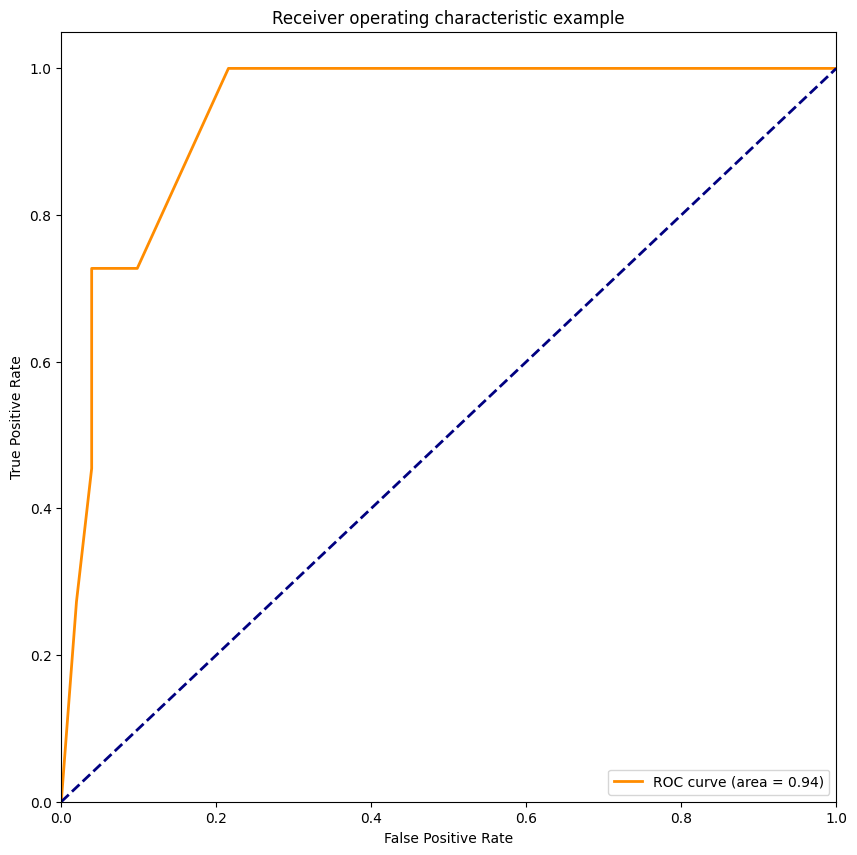

In [338]:
#画出ROC曲线 ExtraTrees train
y_score = clf.fit(X, y).predict_proba(X_train)
fpr,tpr,threshold = roc_curve(y_train, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

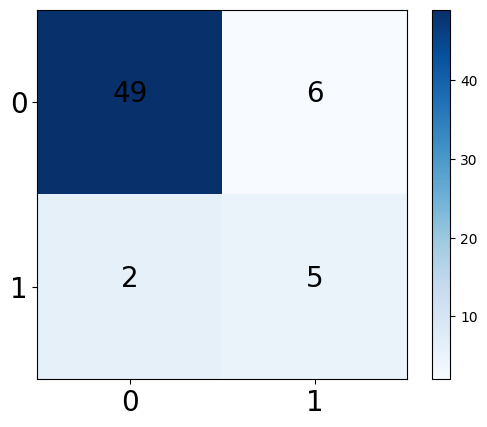

true: 54


In [339]:
#画出混淆矩阵 RandomForest train 混淆矩阵
clf.fit(X, y)
prey=clf.predict(X_train)
true=0
for i in range(0,len(y_train)):
 if prey[i]==y_train[i]:
     true=true+1
C = confusion_matrix(y_train, prey, labels=[0,1])
plt.imshow(C, cmap=plt.cm.Blues)
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=20)
plt.yticks(indices, [0, 1],fontsize=20)
plt.colorbar()
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
        plt.text(first_index, second_index, C[first_index][second_index],fontsize=20,horizontalalignment='center')
plt.show()
print("true:",true)

In [340]:

from sklearn.datasets import make_classification


# Define the parameter grid to search over
param_grid = {
    "kernel": [1.0 * RBF(length_scale=1.0)],
    "optimizer": ['fmin_l_bfgs_b'],
    "n_restarts_optimizer": [0, 1, 2],
    "max_iter_predict": [50, 100, 150]
}

# Create a GaussianProcessClassifier object
clf = GaussianProcessClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found:", grid_search.best_params_)

# Evaluate the best estimator on the test data
print("Test accuracy:", grid_search.score(X_test, y_test))


Best parameters found: {'kernel': 1**2 * RBF(length_scale=1), 'max_iter_predict': 50, 'n_restarts_optimizer': 0, 'optimizer': 'fmin_l_bfgs_b'}
Test accuracy: 0.8125
